In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\TFG155\\.keras\\datasets\\auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

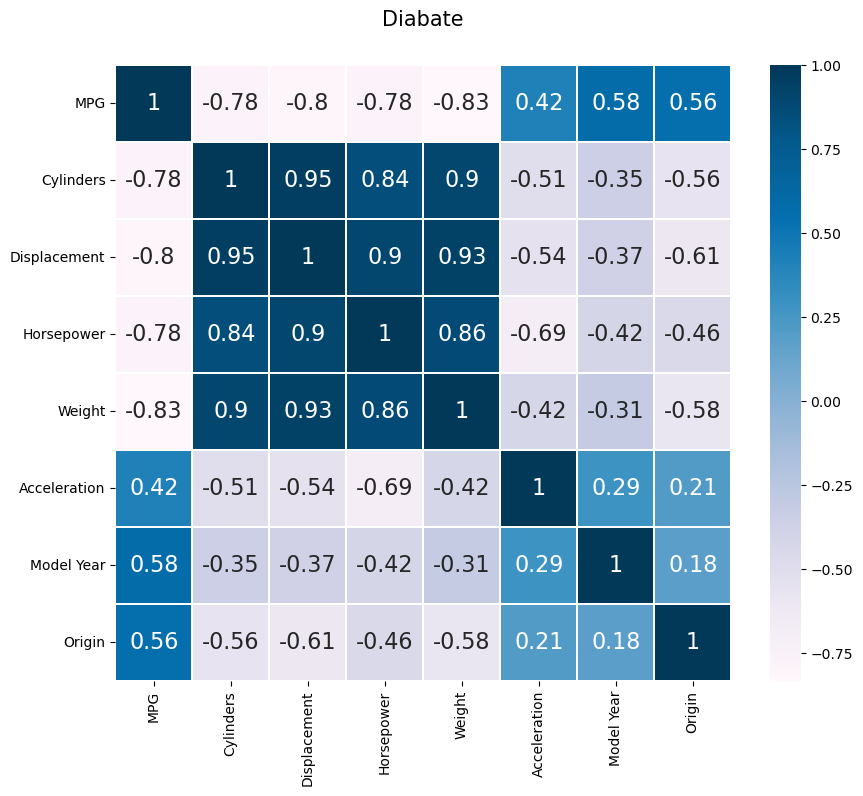

In [5]:
df_data = dataset[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin']]
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Diabate", y = 1.05, size = 15)
sns.heatmap(df_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})
plt.show()

In [6]:
X =dataset.loc[:, ['Model Year', 'Origin', 'Acceleration']]
y =dataset.loc[:, 'MPG']

In [7]:
X = X.to_numpy()
y = y.to_numpy()

X = X.reshape((X.shape[0], X.shape[1], 1))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD,Adam


model = Sequential()

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 32)             96        
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 4,647
Trainable params: 4,647
Non-trainable params: 0
_________________________________________________________________


In [9]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 31ms/step - loss: 665.5802 - mse: 665.5802 - val_loss: 416.4177 - val_mse: 416.4177
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 333.9272 - mse: 333.9272 - val_loss: 253.4643 - val_mse: 253.4643
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 184.9095 - mse: 184.9095 - val_loss: 124.1568 - val_mse: 124.1568
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 85.2575 - mse: 85.2575 - val_loss: 63.4436 - val_mse: 63.4436
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 51.5207 - mse: 51.5207 - val_loss: 50.1627 - val_mse: 50.1627
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 47.3171 - mse: 47.3171 - val_loss: 49.5837 - val_mse: 49.5837
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 47.5384 - mse: 47.5384 - val_loss: 49.6695 - val_mse: 49.6695
Epoch 8/100
10/10 [=======================

In [10]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 40.4237 - mse: 40.4237


[40.42365646362305, 40.42365646362305]